# Association Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('retail_dataset.csv')
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [3]:
items = set()
for col in df:
    items.update(df[col].unique())

In [4]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for cm in commons:
        labels[cm] = 1
    encoded_vals.append(labels)
data = pd.DataFrame(encoded_vals)

In [5]:
freq_items = apriori(data, use_colnames=True, min_support=0.2)

In [6]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.6)

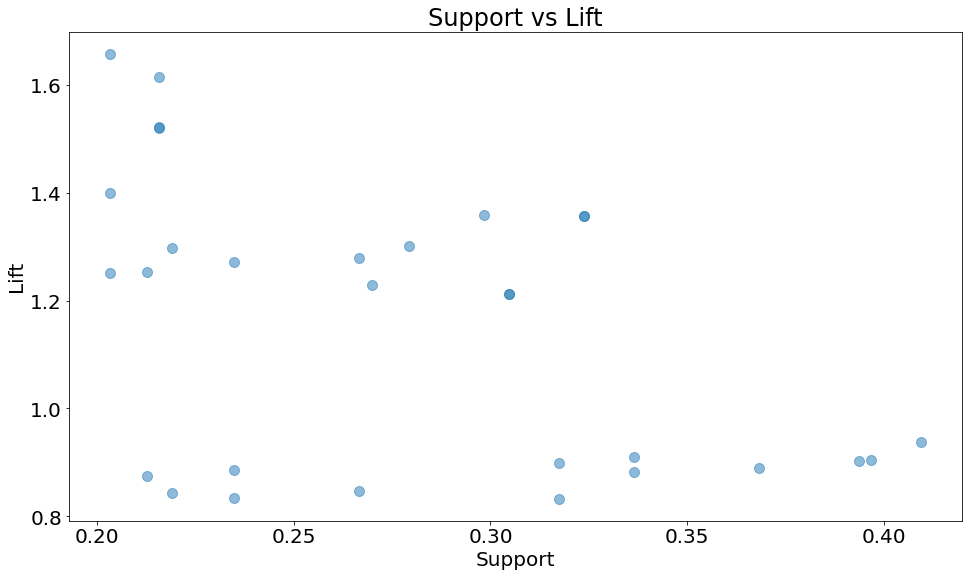

In [7]:
# Support vs lift
plt.figure(figsize=(16, 9))
plt.rc('font', size=20)
plt.scatter(rules['support'], rules['lift'], s=100, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

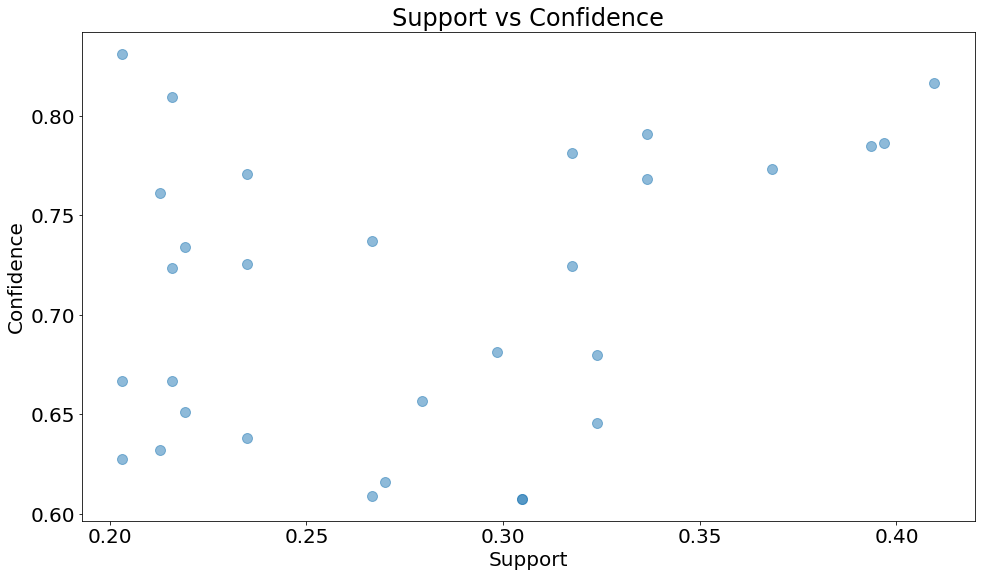

In [8]:
# Support vs confidence
plt.figure(figsize=(16, 9))
plt.rc('font', size=20)
plt.scatter(rules['support'], rules['confidence'], s=100, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

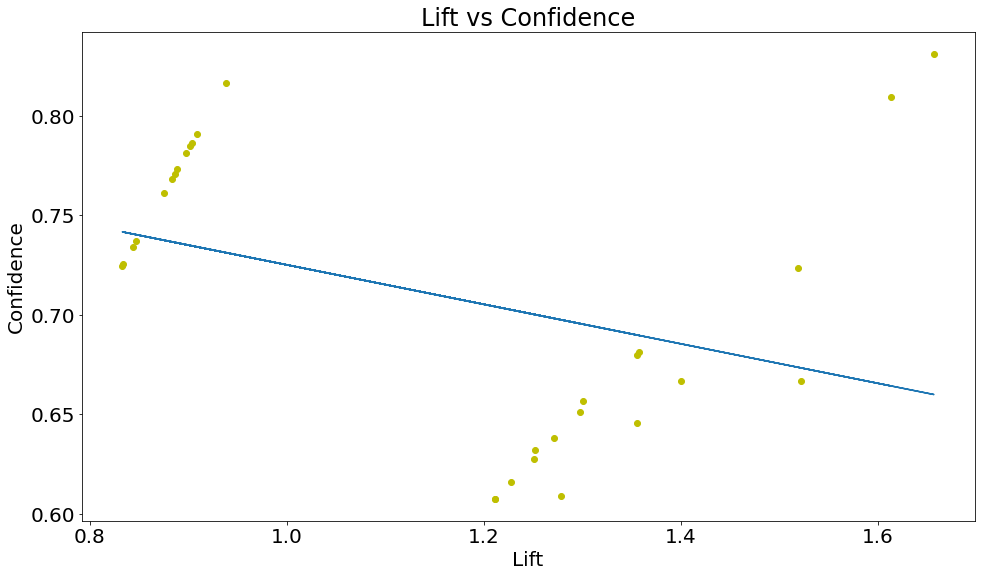

In [9]:
# Lift vs confidence
plt.figure(figsize=(16, 9))
plt.rc('font', size=20)
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()